Summary Statistics:
               year        pieces     minifigs  agerange_min         price
count  18438.000000  18438.000000  8391.000000   6777.000000  18438.000000
mean    2007.949886    191.686897     2.659874      6.635089     26.587950
std       11.948579    400.699038     2.894145      2.774818     34.202086
min     1970.000000      1.000000     1.000000      1.000000      1.490000
25%     2001.000000     32.000000     1.000000      5.000000     19.990000
50%     2011.000000     70.000000     2.000000      6.000000     19.990000
75%     2017.000000    174.000000     3.000000      8.000000     19.990000
max     2022.000000   9090.000000    80.000000     18.000000    849.990000


/var/folders/mf/pjg0mk757xj_7wrzg8xb_7tr0000gn/T/ipykernel_59168/2675365654.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=lego_df['year'], order=sorted(lego_df['year'].unique()), palette="coolwarm")


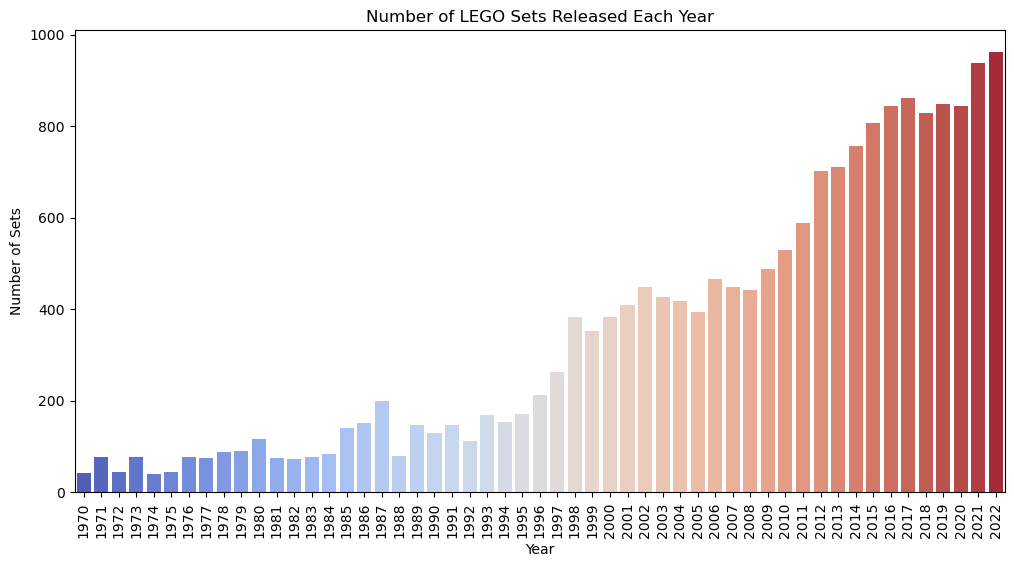

/var/folders/mf/pjg0mk757xj_7wrzg8xb_7tr0000gn/T/ipykernel_59168/2675365654.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_themes.values, y=top_themes.index, palette="viridis")


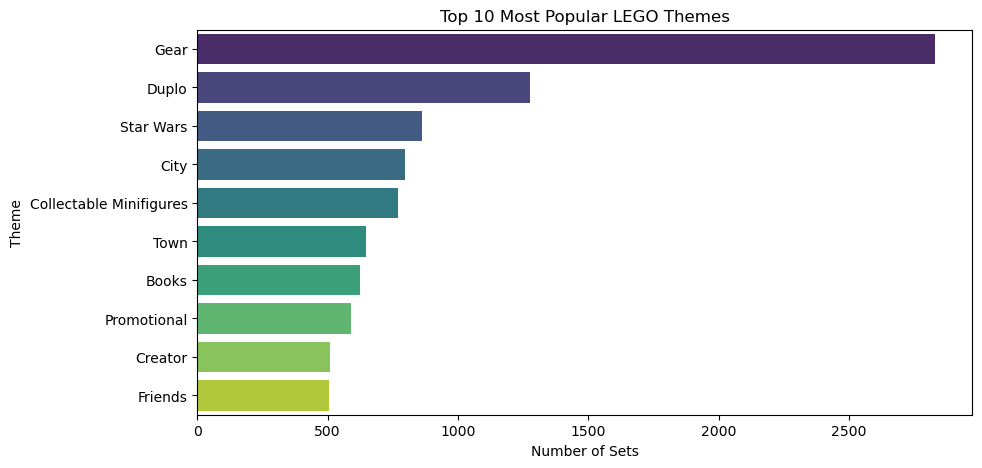

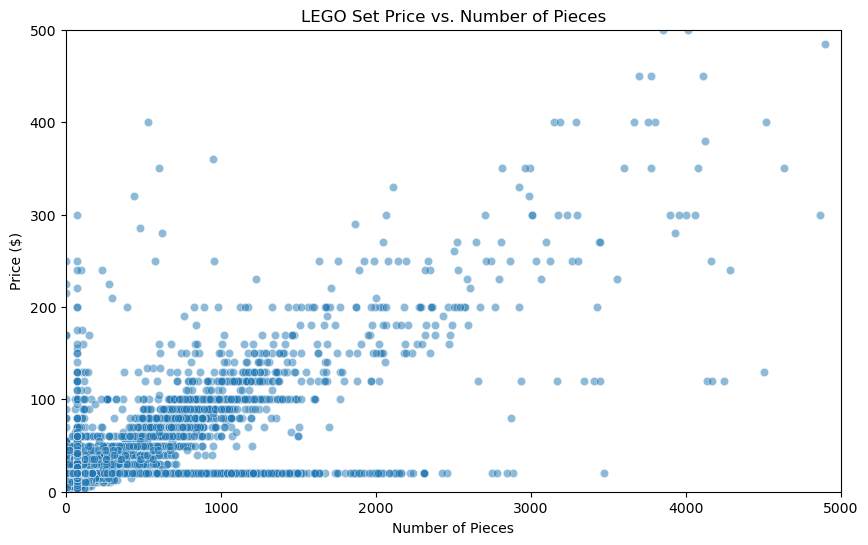

 Traditional Analysis Complete!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading dataset
file_path = "/Users/maazhussain/Downloads/LEGO+Sets/lego_sets.csv"  
lego_df = pd.read_csv(file_path)

# renaming columns for consistency
lego_df.rename(columns={"US_retailPrice": "price"}, inplace=True)

# Data Cleaning & Normalization
lego_df.fillna({
    'price': lego_df['price'].median(),  # Fill missing prices with median value
    'pieces': lego_df['pieces'].median(),  # Fill missing pieces with median
    'theme': 'Unknown',  # Assign 'Unknown' to missing themes
}, inplace=True)

# converting data types
lego_df['year'] = pd.to_numeric(lego_df['year'], errors='coerce').fillna(0).astype(int)
lego_df['price'] = pd.to_numeric(lego_df['price'], errors='coerce').fillna(0.0)
lego_df['pieces'] = pd.to_numeric(lego_df['pieces'], errors='coerce').fillna(0).astype(int)

# removing potential outliers
lego_df = lego_df[(lego_df['price'] >= 0) & (lego_df['price'] <= 1000)]  # Limit price range
lego_df = lego_df[(lego_df['pieces'] >= 1) & (lego_df['pieces'] <= 10000)]  # Limit number of pieces

# summary statistics
summary_stats = lego_df.describe()
print("Summary Statistics:")
print(summary_stats)

# Yearly LEGO Set Releases
plt.figure(figsize=(12, 6))
sns.countplot(x=lego_df['year'], order=sorted(lego_df['year'].unique()), palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Number of LEGO Sets Released Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Sets")
plt.savefig("yearly_lego_releases.png")  
plt.show()

# Top 10 LEGO Themes
top_themes = lego_df['theme'].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_themes.values, y=top_themes.index, palette="viridis")
plt.title("Top 10 Most Popular LEGO Themes")
plt.xlabel("Number of Sets")
plt.ylabel("Theme")
plt.savefig("top_lego_themes.png")  
plt.show()

# Price vs Pieces Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=lego_df, x='pieces', y='price', alpha=0.5)
plt.title("LEGO Set Price vs. Number of Pieces")
plt.xlabel("Number of Pieces")
plt.ylabel("Price ($)")
plt.xlim(0, 5000)  # Limit x-axis to focus on standard sets
plt.ylim(0, 500)  # Limit y-axis to remove extreme prices
plt.savefig("lego_price_vs_pieces.png")  
plt.show()

# Saving Analysis Outputs
lego_df.to_csv("cleaned_lego_data.csv", index=False)  # Save cleaned dataset
summary_stats.to_csv("summary_statistics.csv")  # Save statistics as CSV

print(" Traditional Analysis Complete!")


In [9]:
import os

# List all files in the current directory
print(os.listdir())

# Check specific files
files_to_check = [
    "cleaned_lego_data.csv",
    "summary_statistics.csv",
    "yearly_lego_releases.png",
    "top_lego_themes.png",
    "lego_price_vs_pieces.png"
]

for file in files_to_check:
    print(f"{file} exists: {os.path.exists(file)}")


['.config', 'Music', 'ParkType_Frequency.png', 'Untitled4.py', 'top_lego_themes.png', '.condarc', 'Untitled5.ipynb', 'Untitled1.ipynb', '.DS_Store', 'Downloads\\filtered_dob_employed_data.csv', 'nltk_data', '.CFUserTextEncoding', '.xonshrc', 'EU_OCC_processed.csv', 'Untitled3.ipynb', 'Untitled.ipynb', '.zshrc', 'Creative Cloud Files Company Account SENECA POLYTECHNIC STUDENT CONSOLE mhussain90@myseneca.ca 182D1E88661163CA0A495C91@17621e5d66115f3b495cfb.e', 'Untitled4.ipynb', '.streamlit', 'Untitled6.ipynb', 'Pictures', 'Downloads\\np_summary_processed.csv', 'yearly_lego_releases.png', '.zsh_history', 'Untitled2.ipynb', '.ipython', 'Desktop', 'Library', '.matplotlib', 'lego_price_vs_pieces.png', 'lego_analysis.png', 'GlobalProtectLogs.tgz', 'Downloads\\filtered_credit_data.csv', 'Public', 'cleaned_lego_data.csv', '.tcshrc', 'np_summary_processed.csv', '.anaconda', 'Movies', 'Query1_Results.csv', 'app.py', '.Trash', '.ipynb_checkpoints', '.jupyter', 'Query2_Results.csv', 'Documents', 'su

In [3]:
import shutil

destination_folder = "/Users/maazhussain/Downloads/"

# Move files to Downloads
for file in files_to_check:
    if os.path.exists(file):
        shutil.move(file, destination_folder)
        print(f" Moved {file} to {destination_folder}")
    else:
        print(f" {file} not found.")


NameError: name 'files_to_check' is not defined